1. Create a class that inputs values of a dataset, and with these values the class with Linear Regression method creates a "best fitting line" to the data.
2. The function for linear regression is: ^y = a + bx.
- ^y: predicted values of y.
- b: Y-intercept = level of y when X is 0.
- ax: slope = rate of increase/decrease of Y hat for each unit increase in X.
3. Do the least squares residuals formula to find the optimal slope and intercept for the formula. ((a * x1 + b) - y1)** 2 + ((a * x2 + b) - y2)**2 + ...
4. Take the derivative of SQR related to the slope when it is equals 0.

In [128]:
import numpy as np
import matplotlib.pyplot as plt
class LinearRegression:
    import numpy as np
    # First we get the dependent and independent variables.
    def __init__(self, features: np.ndarray, targets: np.ndarray):
        self.features = features
        self.targets = targets

    def calculateInt(self) -> float:
        n = len(self.features)
        x = self.features
        y = self.targets
        a = (np.sum(y) * np.sum(x ** 2) - np.sum(x) * np.sum(x * y)) / (n * np.sum(x ** 2) - (np.sum(x)) ** 2)
        print(a)
        return a
    
    def calculateSlo(self) -> float:
        n = len(self.features)
        x = self.features
        y = self.targets
        m = (n * np.sum(x * y) - np.sum(x) * np.sum(y)) / (n * np.sum(x**2) - (np.sum(x))**2)
        print(m)
        return m
    
    def calculateCorr(self) -> float:
        n = len(self.features)
        x = self.features
        y = self.targets
        numerator = n*sum(x*y) - sum(x)*sum(y)
        denominator = ((n*sum(x**2) - sum(x)**2) * (n*sum(y**2) - sum(y)**2))
        r = numerator / (denominator**0.5)
        return r
    
    def calculateRSquared(self) -> float:
        rSquared = self.calculateCorr()**2
        return rSquared

    def calculate(self, x: float) -> float:
        y = self.calculateInt() + (self.calculateSlo()*x)
        return y
    
    def show(self):
        plt.scatter(self.features, self.targets, color='blue', label="Dados reais")
        y_pred = self.calculateInt() + self.calculateSlo() * self.features
        plt.plot(self.features, y_pred, color='red', label="Regressão Linear")
        plt.xlabel('Features')
        plt.ylabel('Targets')
        plt.title('Linear Regression')
        plt.legend()
        plt.grid(True)
        plt.show()

In [129]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
df = pd.read_csv('train.csv')
df.head()

df['TotalLivingArea'] = df['1stFlrSF'] + df['2ndFlrSF']
+ df['LowQualFinSF'] + df['GrLivArea'] + df['BsmtFinSF1'] + df['BsmtFinSF2']

#X_scaled = scaler.fit_transform(df['TotalLivingArea'].values.reshape(-1, 1))
X = df['TotalLivingArea']
y = df['SalePrice']

In [130]:
model = LinearRegression(X, y)

In [131]:
round(model.calculateSlo(), 2)

109.27661587643642


np.float64(109.28)

In [132]:
round(model.calculateInt(), 2)

15955.120847421622


np.float64(15955.12)

In [133]:
model.calculateCorr()

0.7168830793692811

In [134]:
model.calculateRSquared()

0.513921349485983

15955.120847421622
109.27661587643642


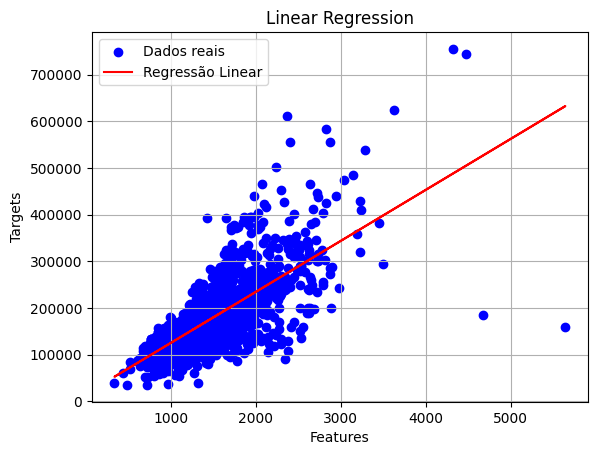

In [135]:
model.show()

In [136]:
round(model.calculate(3000), 2)

15955.120847421622
109.27661587643642


np.float64(343784.97)